In [ ]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

--2024-10-22 09:07:38--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [   <=>              ] 999.85K  1.56MB/s    in 0.6s    

2024-10-22 09:07:44 (1.56 MB/s) - ‘bank+marketing.zip’ saved [1023843]



In [ ]:
!unzip bank+marketing.zip -d /content/

Archive:  bank+marketing.zip
 extracting: /content/bank.zip       
 extracting: /content/bank-additional.zip  


In [ ]:
!unzip bank-additional.zip -d /content/bank-additional/
!unzip bank+marketing.zip -d /content/bank-marketing/
!unzip bank.zip -d /content/bank/


Archive:  bank-additional.zip
   creating: /content/bank-additional/bank-additional/
  inflating: /content/bank-additional/bank-additional/.DS_Store  
   creating: /content/bank-additional/__MACOSX/
   creating: /content/bank-additional/__MACOSX/bank-additional/
  inflating: /content/bank-additional/__MACOSX/bank-additional/._.DS_Store  
  inflating: /content/bank-additional/bank-additional/.Rhistory  
  inflating: /content/bank-additional/bank-additional/bank-additional-full.csv  
  inflating: /content/bank-additional/bank-additional/bank-additional-names.txt  
  inflating: /content/bank-additional/bank-additional/bank-additional.csv  
  inflating: /content/bank-additional/__MACOSX/._bank-additional  
Archive:  bank+marketing.zip
 extracting: /content/bank-marketing/bank.zip  
 extracting: /content/bank-marketing/bank-additional.zip  
Archive:  bank.zip
  inflating: /content/bank/bank-full.csv  
  inflating: /content/bank/bank-names.txt  
  inflating: /content/bank/bank.csv  


In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk

In [ ]:
df = pd.read_csv('/content/bank/bank-full.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Признаки
Для оставшейся части домашнего задания вам нужно будет использовать только следующие столбцы:

age,
job,
marital,
education,
balance,
housing,
contact,
day,
month,
duration,
campaign,
pdays,
previous,
poutcome,
y
Подготовка данных
Выберите только указанные выше признаки.
Проверьте, есть ли пропущенные значения в этих признаках.

In [ ]:
df = df[['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
         'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']]


In [ ]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,58,44,33,47,33,35,28,42,58,43
job,management,technician,entrepreneur,blue-collar,unknown,management,management,entrepreneur,retired,technician
marital,married,single,married,married,single,married,single,divorced,married,single
education,tertiary,secondary,secondary,unknown,unknown,tertiary,tertiary,tertiary,primary,secondary
balance,2143,29,2,1506,1,231,447,2,121,593
housing,yes,yes,yes,yes,no,yes,yes,yes,yes,yes
contact,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5,5,5,5,5,5
month,may,may,may,may,may,may,may,may,may,may
duration,261,151,76,92,198,139,217,380,50,55


Вопрос 1
Какое самое частое значение (mode) для столбца education?

unknown
primary
secondary
tertiary

In [ ]:
df['education'].mode()

,education
0,secondary


In [ ]:
df_selected = df[["age", "balance", "day", "campaign", "pdays", "previous"]]

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,0,False,True,...,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,0,True,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True


Создайте корреляционную матрицу для числовых признаков вашего датасета.
В корреляционной матрице вычислите коэффициент корреляции между каждой парой признаков.

Какие два признака имеют наибольшую корреляцию?

age и balance
day и campaign
day и pdays
pdays и previous

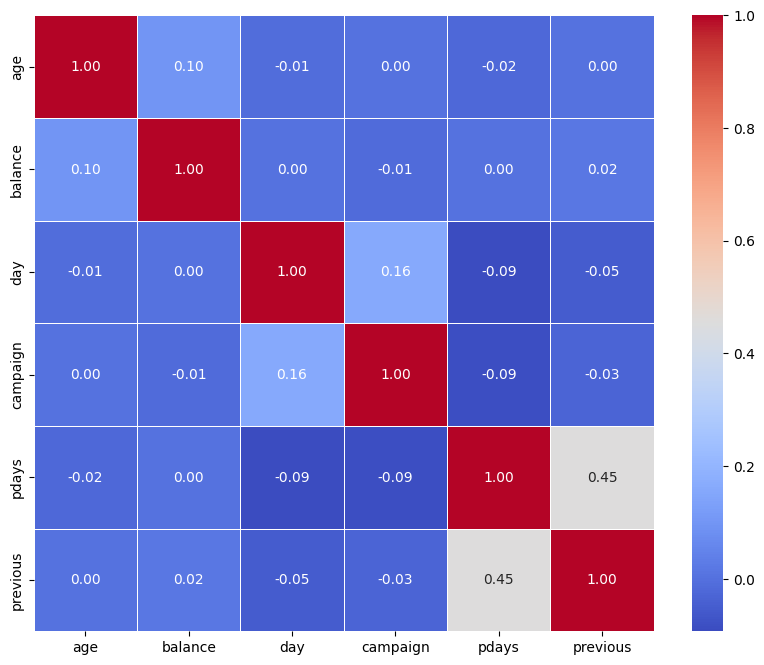

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.show()

In [ ]:
corr_matrix = df_encoded.corr()
target_corr = corr_matrix['y'].sort_values(ascending=False)
print(target_corr)

y                      1.000000
duration               0.394521
poutcome_success       0.306788
month_mar              0.129456
month_oct              0.128531
month_sep              0.123185
pdays                  0.103621
previous               0.093236
job_retired            0.079245
job_student            0.076897
month_dec              0.075164
education_tertiary     0.066448
marital_single         0.063526
balance                0.052838
month_feb              0.038417
job_management         0.032919
poutcome_other         0.031955
age                    0.025155
job_unemployed         0.020390
contact_telephone      0.014042
education_unknown      0.012053
job_self-employed      0.000855
job_unknown            0.000267
month_aug             -0.008536
month_jan             -0.008783
job_technician        -0.008970
month_nov             -0.014937
job_housemaid         -0.015195
month_jun             -0.016805
job_entrepreneur      -0.019662
job_services          -0.027864
day     

Кодирование целевой переменной
Теперь нам нужно закодировать переменную y.
Замените значения yes/no на 1/0.

In [ ]:
df['y']=df['y'].map({'yes':1, "no":0})

Вопрос 3

Рассчитайте взаимную информацию между y и другими категориальными переменными в датасете. Используйте только тренировочный набор.
Округлите результаты до двух знаков после запятой с помощью round(score, 2).
Какая из этих переменных имеет наибольшую взаимную информацию?

contact
education
housing
poutcome

In [ ]:
from sklearn.metrics import mutual_info_score

print(round(mutual_info_score(df.y, df['contact']), 2))

print(round(mutual_info_score(df.y, df['education']), 2))

print(round(mutual_info_score(df.y, df['housing']), 2))

print(round(mutual_info_score(df.y, df['poutcome']), 2))

0.01
0.0
0.01
0.03


Разделение данных
Разделите данные на тренировочный/валидационный/тестовый наборы с распределением 60%/20%/20%.
Используйте для этого Scikit-Learn (функцию train_test_split) и установите seed на 42.
Убедитесь, что целевая переменная y не включена в датафрейм.

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


Вопрос 4

Теперь обучим логистическую регрессию.
Не забывайте, что в датасете есть несколько категориальных переменных. Включите их с использованием one-hot кодирования.
Обучите модель на тренировочном наборе данных.
Чтобы гарантировать воспроизводимость результатов в разных версиях Scikit-Learn, обучите модель с такими параметрами:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
Рассчитайте точность на валидационном наборе данных и округлите ее до двух знаков после запятой.
Какую точность вы получили?

0.6
0.7
0.8
0.9

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(solver = 'liblinear', C = 1.0, max_iter=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print(round(accuracy_score(y_val, y_pred), 2))

0.9


Вопрос 5

Давайте найдем наименее полезный признак, используя технику feature elimination.
Обучите модель со всеми этими признаками (используя те же параметры, что и в Q4).
Теперь исключите каждый признак по очереди и обучите модель без него. Запишите точность для каждой модели.
Для каждого признака рассчитайте разницу между исходной точностью и точностью без этого признака.
Какой из следующих признаков имеет наименьшую разницу?

age
balance
marital
previous

In [42]:

categorical_features = {
    'marital': [col for col in X_train.columns if col.startswith('marital')],
    'age': ['age'],
    'balance': ['balance'],
    'previous': ['previous']
}


def train_without_encoded_feature(feature_group):
    X_train_reduced = X_train.drop(columns=feature_group)
    X_val_reduced = X_val.drop(columns=feature_group)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train_reduced, y_train)

    y_val_pred = model.predict(X_val_reduced)
    return accuracy_score(y_val, y_val_pred)



for feature, cols in categorical_features.items():
    accuracy_without_feature = train_without_encoded_feature(cols)
    accuracy_drop = original_accuracy - accuracy_without_feature
    print(feature, round(accuracy_drop, 4))



marital -0.0003
age -0.0004
balance -0.0001
previous -0.0003


наименьшая разница accuracy_drop у age

Вопрос 6

Теперь давайте обучим регуляризованную логистическую регрессию.
Попробуем следующие значения параметра C: [0, 0.01, 0.1, 1, 10].
Обучите модели с использованием всех признаков, как в 4 вопросе.
Рассчитайте точность на валидационном наборе данных и округлите ее до трех знаков после запятой.
Какое из значений C приводит к наилучшей точности на валидационном наборе?

0.01
0.1
1
10
100

In [46]:
C_values = [0.01, 0.1, 1, 10, 100]

def train(C_):

    model = LogisticRegression(solver='liblinear', C=C_, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_val_pred = model.predict(X_val)
    return round(accuracy_score(y_val, y_val_pred), 3)

for C_ in C_values:
    print(C_, train(C_))


0.01 0.898
0.1 0.901
1 0.9
10 0.901
100 0.9


лучшая точность у С=10

наименьшая разница у age